---

# S00E02 : Misc. - Matplotlib animations

Cyril Desjouy

---

## 1. La philosophie

Le module `matplotlib.animation` fournit deux classes pour créer des animations. Il s'agit de `FuncAnimation` et `ArtistAnimation`.

* `FuncAnimation(fig, func, *args, **kwargs)`: ***Crée une animation en appelant une fonction de manière répétée.***

    * `fig`: figure sur laquelle tracer l'animation.
    * `func`: fonction à appeler pour chaque frame. Le premier argument doit être l'indice de la frame.
<br>

* `ArtistAnimation(fig, artists, *args, **kwargs)`: ***Tous les tracés (et les artists correspondant) doivent être sauvegardés avant la création de l'animation*** *(les artists sont tous les éléments visibles sur une figure).*

    * `fig`: figure sur laquelle tracer l'animation.
    * `artists`:  liste des *artists* pour chaque frame.

Les `**kwargs` principaux sont les suivants:

* `interval`: numerique. Délai entre chaque frame (en ms) valant 200 par défaut.
* `repeat_delay`: numérique. Si l'animation est répétée, ajouter un délai (en ms) entre chaque répétition. Ce délai vaut None par défaut.
* `repeat`: bool. Ajusté à `True` répète l'animation. La valeur par défaut est `True`.
* `blit`: bool. Ajusté à `True`, active le *blitting* pour optimiser le tracé. La valeur par défaut est `False`.




## 2. Exemples

Cette section regroupe quelques exemples de code :

* en utilisant `FuncAnimation` avec des données 1D,
* en utilisant `FuncAnimation` avec des données 2D,
* en utilisant `FuncAnimation` avec des subplots,
* en utilisant `ArtistAnimation` avec des données 1D,
* en utilisant `ArtistAnimation` avec des subplots.

In [1]:
# Common stuff

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def field(A, B):
    return A*np.exp(-1j*2*np.pi*f*x/c) + B*np.exp(1j*2*np.pi*f*x/c)

f, c = 1, 340
Nt, Nx, Ny = 100, 100, 200
t = np.linspace(0, 1/f, Nt)
x = np.linspace(0, c/f, Nx)
y = np.linspace(0, c/(2*f), Ny)

### 2.1. `FuncAnimation` 1D

<IPython.core.display.Javascript object>


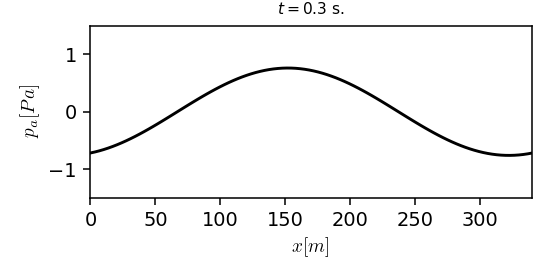

In [4]:
A, B = 0.8, 0.5

def animate(i):
    m = field(A, B)*np.exp(1j*2*np.pi*f*t[i])
    line.set_data(x, m.real)
    ax.set_title(r'$t = {:.1f}$ s.'.format(t[i]), fontsize=8)
    return line,

fig, ax = plt.subplots(figsize=(4, 2))
line, = ax.plot([], [], 'k', linewidth=1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(0, c/f)
ax.set_xlabel(r'$x [m]$', usetex=True)
ax.set_ylabel(r'$p_a [Pa]$', usetex=True)

# blit=False pour updater aussi le titre !
ani = animation.FuncAnimation(fig, animate, frames=Nt, interval=20, blit=False, repeat=True)
plt.tight_layout()
#ani.save('func_1D.mp4')
plt.show()

### 2.2. `FuncAnimation` 2D

<IPython.core.display.Javascript object>


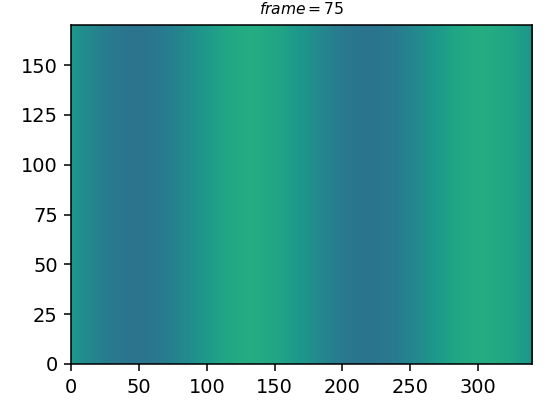

In [7]:
def animate(i):
    p = m*np.exp(1j*2*np.pi*f*t[i])
    movie.set_data(p.real)
    ax.set_title(r'$frame=${}'.format(i), fontsize=8)

m = np.tile(field(A, B), Ny).reshape(Nx, Ny)

fig, ax = plt.subplots(figsize=(4, 3))
movie = ax.pcolorfast(x, y, m.real)

# blit=False pour updater aussi le titre !
ani = animation.FuncAnimation(fig, animate, frames=Nt, interval=30, blit=False, repeat=True)
plt.tight_layout()
#ani.save('func_2D.mp4')
plt.show()

### 2.3. `FuncAnimation` avec subplots

<IPython.core.display.Javascript object>


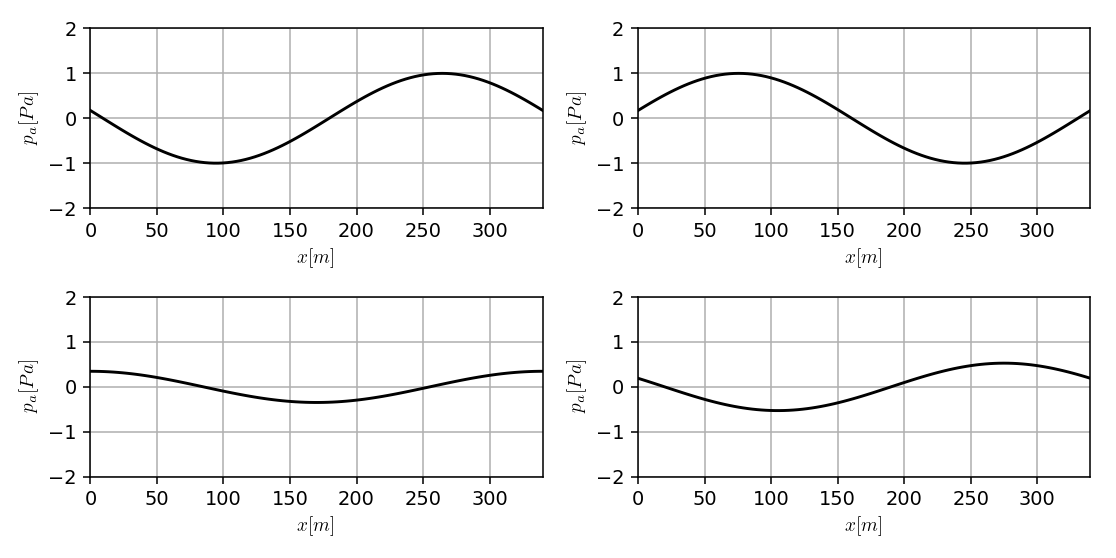

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(8, 4))
lines = []

for ax in axes.ravel():
    line, = ax.plot([], [], 'k', linewidth=1.5)
    lines.append(line)
    ax.set_ylim(-2, 2)
    ax.set_xlim(0, c/f)
    ax.set_xlabel(r'$x [m]$', usetex=True)
    ax.set_ylabel(r'$p_a [Pa]$', usetex=True)
    ax.grid()


def animate(i):
    for line, a, b in zip(lines, (0, 1, 1, 0.3), (1, 0, 1, 0.8)):
        s = field(a, b)*np.exp(1j*2*np.pi*f*t[i])
        line.set_data(x, s.real)
    return lines,

# blit=False pour updater aussi le titre !
ani = animation.FuncAnimation(fig, animate, frames=Nt, interval=20, blit=False, repeat=True)
plt.tight_layout()
#ani.save('func_subplots.mp4')
plt.show()

### 2.4. `ArtistAnimation` 1D

<IPython.core.display.Javascript object>


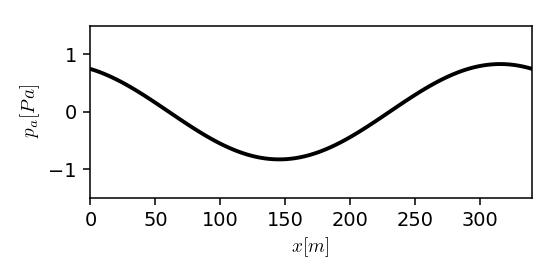

In [11]:
A, B = 0.3, 0.8

fig, ax = plt.subplots(figsize=(4, 2))
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(0, c/f)
ax.set_xlabel(r'$x [m]$', usetex=True)
ax.set_ylabel(r'$p_a [Pa]$', usetex=True)

lines = []
for ti in t:
    m = field(A, B)*np.exp(1j*2*np.pi*f*ti)
    line = ax.plot(x, m.real, 'k', linewidth=2, animated=True)
    lines.append(line)

ani = animation.ArtistAnimation(fig, lines, interval=50, blit=True)
plt.tight_layout()
#ani.save("artist_1D.mp4")
plt.show()

### 2.5. `ArtistAnimation` avec subplots

<IPython.core.display.Javascript object>


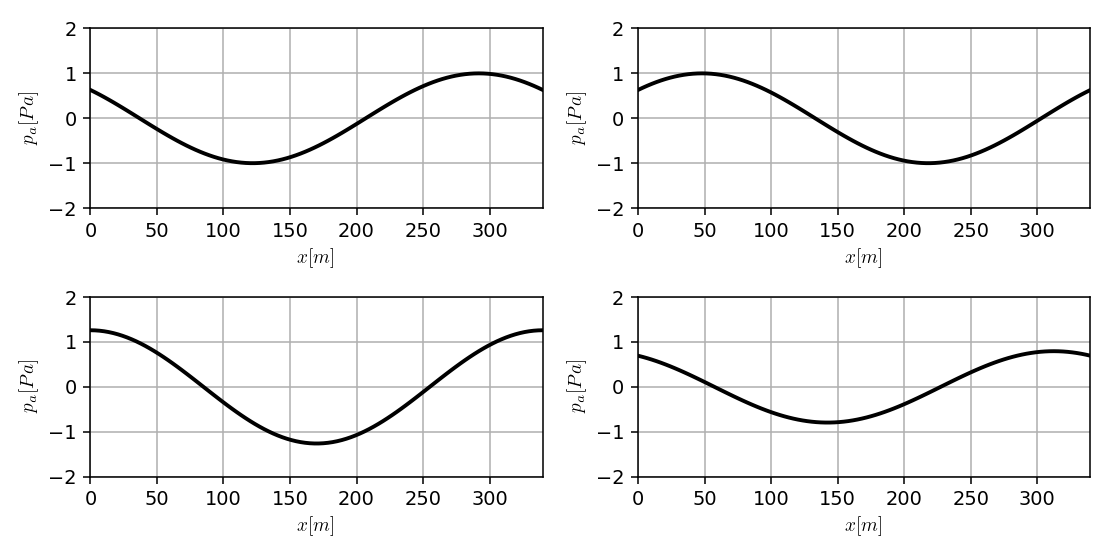

In [7]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, axes = plt.subplots(2, 2, figsize=(8, 4))

for ax in axes.ravel():
    ax.set_ylim(-2, 2)
    ax.set_xlim(0, c/f)
    ax.set_xlabel(r'$x [m]$', usetex=True)
    ax.set_ylabel(r'$p_a [Pa]$', usetex=True)
    ax.grid()

lines = []
for ti in t:
    sublines = []
    for ax, a, b in zip(axes.ravel(), (0, 1, 1, 0.3), (1, 0, 1, 0.8)):
        m = field(a, b)*np.exp(1j*2*np.pi*f*ti)    
        line, = ax.plot(x, m.real, 'k', linewidth=2, animated=True)
        sublines.append(line)
    lines.append(sublines)
    
ani = animation.ArtistAnimation(fig, lines, interval=50, blit=True)
plt.tight_layout()
#ani.save("artist_1D.mp4")
plt.show()